In [2]:
import numpy as np
import os
#import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import vis
import json
from tensorflow.keras.models import model_from_json, load_model

In [3]:
density = '04'

#mode = 'expressive'
mode = 'receptive'


open_arch_name = 'RN_model_' + mode + '_arch_density_' + density + '.json'

with open(open_arch_name, 'r') as f:
    RN_model = model_from_json(f.read())
    

open_weights_name = 'RN_model_' + mode + '_weights_density_' + density + '.h5'

RN_model.load_weights(open_weights_name)

RN_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 116, 116, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 114, 114, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 57, 57, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 57, 57, 32)   128         max_pooling2d_1[0][0]            
____________________________________________________________________________________________

x_train_mat_shape: (116, 116, 17374)
y_train_mat_shape: (17374, 1)
x_test_mat_shape: (116, 116, 8687)
y_test_mat_shape: (8687, 1)
x_train_shape: (17374, 116, 116, 1)
y_train_shape: (17374, 1)
x_test_shape: (8687, 116, 116, 1)
y_test_shape: (8687, 1)


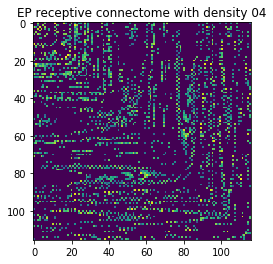

In [4]:
# Load Data

# receptive data dir
dir_name = '../processed_data/receptive_data/'

density = '04'

# load train data

fname = 'x_train_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_train_mat = sio.loadmat(filename)['x_train_receptive_mat']
x_train_mat = np.float32(x_train_mat)

fname = 'y_train_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_train_mat = sio.loadmat(filename)['y_train_receptive_mat']
y_train_mat = np.float32(y_train_mat)

# load test data
fname = 'x_test_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_test_mat = sio.loadmat(filename)['x_test_receptive_mat']
x_test_mat = np.float32(x_test_mat)

fname = 'y_test_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_test_mat = sio.loadmat(filename)['y_test_receptive_mat']
y_test_mat = np.float32(y_test_mat)

print('x_train_mat_shape:',x_train_mat.shape)
print('y_train_mat_shape:',y_train_mat.shape)
print('x_test_mat_shape:',x_test_mat.shape)
print('y_test_mat_shape:',y_test_mat.shape)


# Form training and testing data

x_train = np.zeros((x_train_mat.shape[2],116,116,1),dtype=np.float32)
y_train = np.zeros((x_train_mat.shape[2],1),dtype=np.float32)

x_test = np.zeros((x_test_mat.shape[2],116,116,1),dtype=np.float32)
y_test = np.zeros((x_test_mat.shape[2],1),dtype=np.float32)


for i in range(x_train_mat.shape[2]):
    x_train[i,:,:,0] = x_train_mat[:,:,i]
    y_train[i,0] = y_train_mat[i,0] # RECEPTIVE SCORE
        
for i in range(x_test_mat.shape[2]):
    x_test[i,:,:,0] = x_test_mat[:,:,i]
    y_test[i,0] = y_test_mat[i,0]  # RECEPTIVE SCORE
    
    
print('x_train_shape:',x_train.shape)
print('y_train_shape:',y_train.shape)
print('x_test_shape:',x_test.shape)
print('y_test_shape:',y_test.shape)


x_patient_2 = x_train[2,:,:,0]

plt.figure()
plt.imshow(x_patient_2)
plt.title('EP receptive connectome with density'+' '+density)
plt.show()

In [5]:
x_pat_2 = x_patient_2[np.newaxis,:,:,np.newaxis]
x_pat = x_test[0,:,:,0]
x_pat_3 = x_pat[np.newaxis,:,:,np.newaxis]
#print(x_pat_2.shape)
y_pred = RN_model.predict(x_pat_3)
print(y_pred)

[[0.4302757]]


In [6]:
# Test RN Model

y_test_pred = RN_model.predict(x_test)

print(y_test.shape)
print('y_test:', y_test)


print(y_test_pred.shape)
print('y_test_pred:', y_test_pred)


# Print Results
print('mae: ', np.mean(np.abs(y_test - y_test_pred)))
print('sdae: ', np.std(np.abs(y_test - y_test_pred)))

count = 0
for i in range(len(y_test)):
    if (np.abs(y_test[i] - y_test_pred[i])) < 0.125: # prob of abs error less than 15 - 15/120 = 0.125
        count += 1
    if (np.abs(y_test[i] - y_test_pred[i])) < 0.000002:
        print(i)
        print(y_test[i])
        print(y_test_pred[i])
        
prob_error = count / len(y_test)

print('prob of mae less than 0.125: ', prob_error)

(8687, 1)
y_test: [[0.425     ]
 [0.68333334]
 [0.55      ]
 ...
 [0.4838197 ]
 [0.48336178]
 [0.49166667]]
(8687, 1)
y_test_pred: [[0.4302757 ]
 [0.6914018 ]
 [0.5499345 ]
 ...
 [0.4835358 ]
 [0.48352695]
 [0.49115252]]
mae:  0.0074869744
sdae:  0.021041542
6076
[0.7189705]
[0.71896917]
6854
[0.84166664]
[0.84166795]
7143
[0.84166664]
[0.8416668]
8230
[0.4888621]
[0.4888639]
8372
[0.48917493]
[0.48917353]
8629
[0.48963806]
[0.48963958]
prob of mae less than 0.125:  0.9948198457465178


In [9]:
abs_error_arr = np.zeros((len(y_test),1),dtype=np.float32)

for i in range(len(y_test)):
    abs_error_arr[i] = np.abs(y_test[i] - y_test_pred[i])
    
print("Absolute Error Vector shape : ", abs_error_arr.shape)
print("Absolute Error Vector: ", abs_error_arr)

sorted_idxs = np.argsort(abs_error_arr,axis=0)
sorted_abs_error_arr = np.sort(abs_error_arr,axis=0)

print("Sorted Index: ", sorted_idxs)
print("Sorted Absolute Error Vector shape : ", sorted_abs_error_arr.shape)
print("Sorted Absolute Error Vector: ", sorted_abs_error_arr)

print(sorted_idxs[10])

print(np.abs(y_test[7143]-y_test_pred[7143]))

Absolute Error Vector shape :  (8687, 1)
Absolute Error Vector:  [[5.2756965e-03]
 [8.0684423e-03]
 [6.5505505e-05]
 ...
 [2.8389692e-04]
 [1.6516447e-04]
 [5.1414967e-04]]
Sorted Index:  [[7143]
 [6854]
 [6076]
 ...
 [4154]
 [2795]
 [3033]]
Sorted Absolute Error Vector shape :  (8687, 1)
Sorted Absolute Error Vector:  [[1.7881393e-07]
 [1.3113022e-06]
 [1.3113022e-06]
 ...
 [1.4103639e-01]
 [1.4122254e-01]
 [1.4146611e-01]]
[6521]
[1.7881393e-07]


In [8]:
top = 20

best_cases = np.zeros((top,x_test.shape[1], x_test.shape[2],1),dtype=np.float32)

print(best_cases.shape)

for i in range(top):
    best_cases[i,:,:,0] = x_test[sorted_idxs[i][0],:,:,0]
    


y_pred_best = RN_model.predict(best_cases)

print(y_pred_best)

(20, 116, 116, 1)
[[0.8416668 ]
 [0.84166795]
 [0.71896917]
 [0.48917353]
 [0.48963958]
 [0.4888639 ]
 [0.70835155]
 [0.5617651 ]
 [0.5041485 ]
 [0.48948592]
 [0.7084698 ]
 [0.58021265]
 [0.48863032]
 [0.48862544]
 [0.7084729 ]
 [0.5021919 ]
 [0.7189088 ]
 [0.71918416]
 [0.488731  ]
 [0.4890887 ]]


In [10]:
for ilayer, layer in enumerate(RN_model.layers):
    print('{:3.0f} {:10}'.format(ilayer, layer.name))

  0 input_1   
  1 conv2d_1  
  2 max_pooling2d_1
  3 batch_normalization_1
  4 conv2d_2  
  5 max_pooling2d_2
  6 batch_normalization_2
  7 conv2d_3  
  8 max_pooling2d_3
  9 batch_normalization_3
 10 conv2d_4  
 11 max_pooling2d_4
 12 batch_normalization_4
 13 lambda_1  
 14 lambda_2  
 15 lambda_4  
 16 lambda_3  
 17 concatenate_1
 18 dense_1   
 19 activation_1
 20 dense_2   
 21 activation_2
 22 dense_3   
 23 activation_3
 24 dense_4   
 25 activation_4
 26 average_1 
 27 dense_5   
 28 activation_5
 29 dropout_1 
 30 dense_6   
 31 activation_6
 32 dropout_2 
 33 dense_7   
 34 activation_7
 35 dense_8   


(116, 116)
(1, 116, 116, 1)
(116, 116, 1)


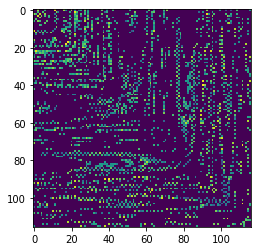

[[0.7189692]]


In [11]:
# Connectome matrix of patient used for training
#x_pat = x_train[0,:,:,0]
x_pat = x_test[6076,:,:,0]
x_pat_3 = x_pat[np.newaxis,:,:,np.newaxis]
print(x_pat.shape)
print(x_pat_3.shape)
y_pred = RN_model.predict(x_pat_3)
img = x_pat
img = img.reshape(x_train.shape[1], x_train.shape[2], 1)
print(img.shape)
#img = img.resize((116,116,1))

plt.imshow(img[...,0])
plt.show()
print(y_pred)

In [12]:
from vis.utils import utils
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation

Using TensorFlow backend.


In [13]:
layer_idx = utils.find_layer_idx(RN_model,'dense_8')
#layer_idx = utils.find_layer_idx(RN_model,'average_1')

In [14]:
# Calculate saliency
grads = visualize_saliency(RN_model, layer_idx, filter_indices=0, seed_input=img, backprop_modifier=None)

(116, 116)


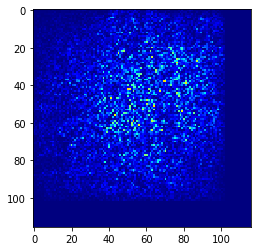

In [15]:
plt.imshow(grads, cmap='jet')
print(grads.shape)

In [16]:
# Calculate Grad-CAM
#penultimate_layer_idx = utils.find_layer_idx(RN_model,'batch_normalization_4')
penultimate_layer_idx = utils.find_layer_idx(RN_model,'conv2d_4')
#penultimate_layer_idx = utils.find_layer_idx(RN_model,'average_1')
#penultimate_layer_idx = utils.find_layer_idx(RN_model,'max_pooling2d_4')


seed_input = img
filter_indices=0
class_idx = 0

In [17]:
grad_ram = visualize_cam(RN_model, layer_idx, filter_indices, seed_input, 
                         penultimate_layer_idx = penultimate_layer_idx,
                         backprop_modifier = None,
                         grad_modifier = None) 
print(grad_ram.shape)

(116, 116)


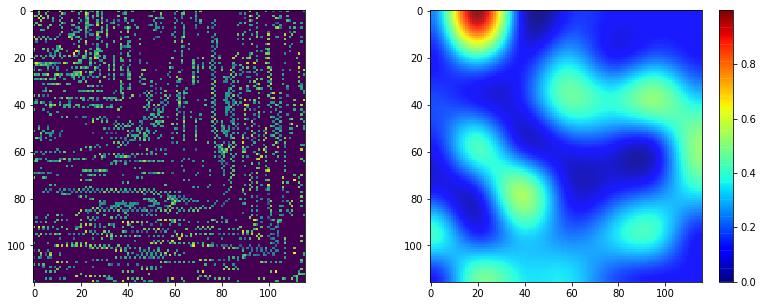

In [18]:
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(x_pat)    
    #axes[1].imshow(x_pat)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.9)
    fig.colorbar(i,ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    
plot_map(grad_ram)